## Observations and Insights 

In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharm = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
pharm

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [141]:
# Checking the number of mice in the DataFrame.
n_mice = len(pharm['Mouse ID'].unique())
n_mice
#249 mice

249

In [142]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pharm_duplicates = pharm.duplicated(subset=['Mouse ID', 'Timepoint'], keep = 'first')
pharm_duplicates.loc[pharm_duplicates==True]
pharm_clean.loc[pharm_clean['Mouse ID']=='g989']

909    True
911    True
913    True
915    True
917    True
dtype: bool

In [150]:
# Optional: Get all the data for the duplicate mouse ID. 
pharm_duplicates_data = pharm.iloc[[918,919,920]]

pharm.loc[pharm['Mouse ID']=='g989']

pharm_duplicates_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [171]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharm_clean = pharm.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep= False)
pharm_clean.rename(columns={'Mouse ID':'Mouse_ID'})
pharm2 = pharm_clean[pharm_clean['Mouse ID']!= 'g989']



NameError: name 'index' is not defined

In [175]:
# Checking the number of mice in the clean DataFrame.
n_mice_clean = len(pharm2['Mouse ID'].unique())
n_mice_clean

248

In [204]:
pharm2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [191]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimens = pharm2.groupby('Drug Regimen')

summary_table = pd.DataFrame()

summary_table['mean tumor volume (mm3)'] = regimens['Tumor Volume (mm3)'].mean()
summary_table['median tumor volume (mm3)'] = regimens['Tumor Volume (mm3)'].median()
summary_table['variance'] = regimens['Tumor Volume (mm3)'].var()
summary_table['standard deviation'] = regimens['Tumor Volume (mm3)'].std()
summary_table['standard error'] = regimens['Tumor Volume (mm3)'].sem()
# This method produces everything in a single groupby function.
summary_table

,mean tumor volume (mm3),median tumor volume (mm3),variance,standard deviation,standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

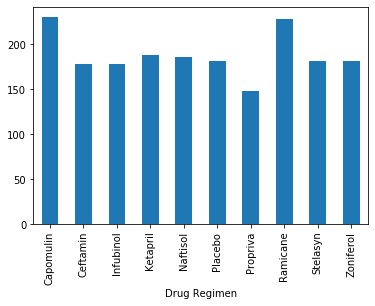

In [202]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
regimens_frame = regimens['Timepoint'].count()
time_plot = regimens_frame.plot.bar(y='Timepoint')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

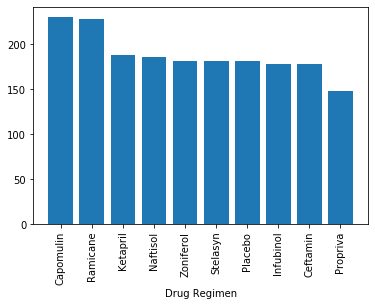

In [244]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

drugs_data = pharm2['Drug Regimen'].value_counts()
drugs = ['Capomulin','Ramicane','Ketapril','Naftisol','Zoniferol','Stelasyn','Placebo','Infubinol','Ceftamin','Propriva']


drugs_plot = plt.bar(drugs, drugs_data)
plt.xlabel("Drug Regimen")
plt.xticks(rotation='vertical')



## Pie Plots

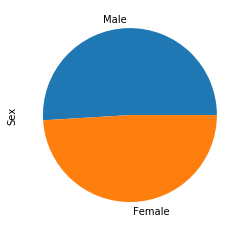

In [265]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = pharm2['Sex'].value_counts()
pharm_pie = sex_data.plot.pie()

([<matplotlib.patches.Wedge at 0x1aae459290>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

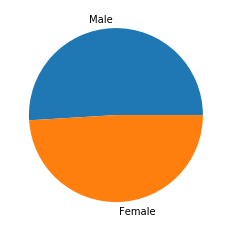

In [249]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sexes = ['Male', 'Female']
plt.pie(sex_data, labels= sexes)

## Quartiles, Outliers and Boxplots

In [337]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
end = pharm2.drop_duplicates(subset='Mouse ID', keep='last')
end
outcome = pharm2.groupby('Drug Regimen').mean()
rank = outcome.sort_values(by='Tumor Volume (mm3)')
rank
best = rank.iloc[0:4]
best
end
best_final1 = end[end['Drug Regimen']=='Ramicane']
best_final2 = end[end['Drug Regimen']=='Capomulin']
best_final3 = end[end['Drug Regimen']=='Propriva']
best_final4 = end[end['Drug Regimen']=='Ceftamin']

best_final = best_final1.append(best_final2.append(best_final3.append(best_final4)), ignore_index=True)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,g791,Ramicane,Male,11,16,45,29.128472,1
2,s508,Ramicane,Male,1,17,45,30.276232,0
3,m546,Ramicane,Male,18,16,45,30.564625,1
4,z578,Ramicane,Male,11,16,45,30.638696,0
5,j913,Ramicane,Female,4,17,45,31.560470,1
6,n364,Ramicane,Male,4,17,45,31.095335,1
7,c758,Ramicane,Male,9,17,45,33.397653,1
8,a644,Ramicane,Female,7,17,45,32.978522,1
9,i177,Ramicane,Male,10,18,45,33.562402,3


In [343]:
regimens_quartiles = best_final['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = regimens_quartiles[0.25]
upperq = regimens_quartiles[0.75]
median = regimens_quartiles[0.50]
iqr = upperq-lowerq
quartiles = [lowerq, median, upperq]
quartiles

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

regimens_outliers = best_final.loc[(best_final['Tumor Volume (mm3)'] < lower_bound) | (best_final['Tumor Volume (mm3)'] > upper_bound)]
regimens_outliers
#no outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


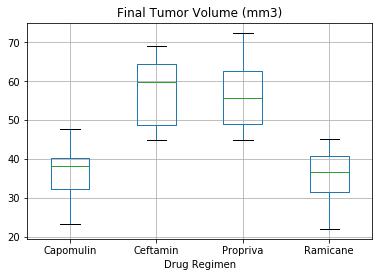

In [362]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor = best_final.groupby('Drug Regimen')
final_box = best_final.boxplot(by='Drug Regimen', column='Tumor Volume (mm3)')
plt.title('Final Tumor Volume (mm3)')
plt.suptitle('')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

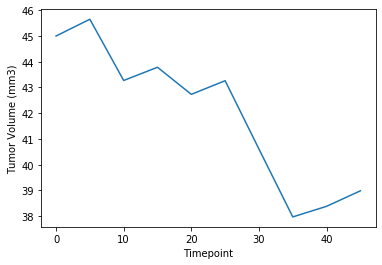

In [381]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
b128 = pharm2.loc[pharm2['Mouse ID']=='b128']
x_axis = [0,5,10,15,20,25,30,35,40,45]
volumes = b128['Tumor Volume (mm3)']
b128
volumes
b128_line = plt.plot(x_axis, volumes)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

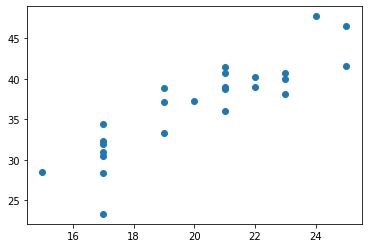

In [392]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(best_final2['Weight (g)'], best_final2['Tumor Volume (mm3)'])


## Correlation and Regression

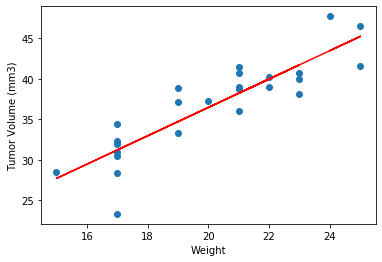

In [408]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = best_final2['Weight (g)']
volume = best_final2['Tumor Volume (mm3)']
wv_cor = round(st.pearsonr(weight,volume)[0],2)
wv_cor
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,volume)
regress_values = weight * slope + intercept
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()